# $\color{orange}{\text{Week 6 - An introduction to Machine Learning (PART 1)}}$


$\color{red}{\text{Time: 60min}}$

$\color{red}{\text{The pace of the meeting is expected as quite intensive due to wide scope of topics.}}$

$\color{red}{\text{Please write questions on the chat.}}$





### Aims

#### This week

- Theoretical lecture: 
  - comparing ML model with statistical model
  - types of problems where ML is helpful
  - challenges in the field of machine learning
  - comparison of regression, classification and clustering
  - stages of creating the ML project
  - introduction to Scikit-learn package

- Recreate the simple and multivariate regressions based on the [Breast Cancer Gene Expression Profiles (METABRIC)](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric)
- Generate some intuition for the properties of regression and introduction of CART algorithm using a wages dataset from the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html)

### Next week
- Exploration of our knowledge about classifiers and ensemble methods - Decision Trees and Random Forests based on the set [Digits dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
- How we can be more systematic about how we pick the final model
- Introduction to the homework with a hands-on with data based on a [nature machine intelligence](https://www.nature.com/natmachintell/) paper, ["An interpretable mortality prediction model for COVID-19 patients"](https://www.nature.com/articles/s42256-020-0180-7).

- Talk about key differences between Machine Learning, Deep Learning and Artificial Intelligence buzzwords

### Learning objectives

- Acquire a basic familiarity with the jargon and concepts of the Machine Learning in practical terms
- Implement an end-to-end machine learning classification model using the Scikit-learn framework

# **Quick replay and a bit of perspective**

**What is Data Science focused on?** 

**What is the heart of statistics?**

**What is the centre of focus for the classical statistics?**

**Are statistical significance tests needed in Big Data?**

**What is the basic function of a hypothesis test?**

### **ML vs. statistical model - what is the difference?**

When it comes to statistics and ML, ML would not exist without statistics. Comparing ML and statistical models is a bit more difficult. Which one we use depends a lot on what the purpose is. If you simply want to create an algorithm that can predict asset prices with high accuracy or use data to determine it, ML is likely to be the better approach. If we are trying to prove the relationship between variables or draw conclusions from the data, then a statistical model is likely to be the better approach. 
 
However, if we don't have a strong background in statistical knowledge, we can still study and use ML. The high level of abstraction offered by ML programming libraries makes it quite easy to use without being an expert in the field. However, we still need a minimal understanding of basic statistical concepts to prevent overfitting of models.

There are many statistical models that can make predictions, but accuracy is not their strong suit. Machine learning models, on the other hand, provide varying degrees of data interpretation (from highly interpretable LASSO regression to neural networks), but generally sacrifice interpretability for predictive power.

The goal of Machine Learning in this case is to get the best performance on the test suite.

For the statistical model, we find a line that minimizes the mean square error on all data, assuming the data is a linear regressor with random noise added, which is typically Gaussian in nature. No training or any test kit is necessary. In many cases, especially in studies (such as the sensor example below), the purpose of the model is to characterize the relationship between the data and the outcome variable, rather than to predict future data. We call this procedure statistical inference, as opposed to making predictions. However, we can still use this model for prediction, and that could be the main goal. However, the way in which the model is evaluated will not involve the test suite, but instead will involve an evaluation of the relevance and robustness of the model parameters.

### **4 types of problems that machine learning can best solve**

1. problems that require frequent algorithm tuning or the use of long lists of rules - often one machine learning algorithm simplifies the application and improves its speed compared to the traditional approach

2. complex problems that cannot be solved by traditional methods - the best machine learning algorithms are able to find a solution

3. changing environments - the machine learning mechanism can adapt to new data

4. helping people to analyze complex issues and huge amounts of data; teaching people (e.g. data mining)

### **Challenges**

The main challenges in the field of ML are: 
- lack of data
- low data quality
- unrepresentative data
- unhelpful features
- over-simplified under-training models
- overly complex models that tend to overtrain

### **Steps during creation of a ML project**
1. identify the problem and analyze it in a broader perspective
2. collect (i.e. buy) and prepare data
3. perform data analysis to detect additional information (including visualizations)
4. prepare of data in a way that shows the patterns used by Machine Learning algorithms (i.e. standarization, normalization)
5. check multiple models and shortlist the most efficient ones
6. perform fine-tuning of models / hyperparameter tuning and combinine them to achieve even better results (ensemble methods)
7. present the solution / prediction
8. execute the maintenance of the system

### Introduction to Scikit-learn package

[Guide with some of the main features that scikit-learn provides](https://scikit-learn.org/stable/getting_started.html)

# 4 most common uses of unsupervised learning

- cluster analysis (clustering)


- detection of anomalies and news (anomaly detection, e.g. financial transactions or production defects, novelity detection - requires a clean set of input data, history of chihuahua)


- visualization and reduction of dimensions


- learning using association rules (association rule learning), the aim is to analyze a huge amount of data and discover interesting relationships between attributes, e.g. which goods in the store are often bought together

**2 most common uses of supervised learning**

- classification
- regression

You will need to install the [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), [matplotlib](https://matplotlib.org/), [plotnine](https://plotnine.readthedocs.io/en/stable/) and [xlrd](https://xlrd.readthedocs.io/en/latest/) packages to run this notebook, and you'll require Python >=3.6 (first release 2016-12-23; newest version 3.10 was published on 2021-10-04).

 To install these packages, set up the environment as shared in https://github.com/semacu/202110-data-science-python/blob/main/notebooks/week0_materials.ipynb

## 1. Linear regression

If we have a continuous variable, and we want to model its relationship with another variable, we can use simple linear regression. In linear regression we call the variable of interest the response, and the other variable the predictor. The mathematical details of linear regression are beyond the scope of this course, but in the case of simple linear regression it basically amounts to fitting a line through the data that is closest to all of the points. For example, we may want to predict survival time based on tumour size, because survival time appears to differ across the range of tumour sizes:

In [1]:
import pandas as pd
import numpy as np

In [2]:
metabric = pd.read_csv("https://raw.githubusercontent.com/semacu/202105-data-science-python/main/data/metabric_clinical_and_expression_data.csv").dropna() # NA drop
metabric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 1 to 1664
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_ID                     1121 non-null   object 
 1   Cohort                         1121 non-null   int64  
 2   Age_at_diagnosis               1121 non-null   float64
 3   Survival_time                  1121 non-null   float64
 4   Survival_status                1121 non-null   object 
 5   Vital_status                   1121 non-null   object 
 6   Chemotherapy                   1121 non-null   object 
 7   Radiotherapy                   1121 non-null   object 
 8   Tumour_size                    1121 non-null   float64
 9   Tumour_stage                   1121 non-null   float64
 10  Neoplasm_histologic_grade      1121 non-null   float64
 11  Lymph_nodes_examined_positive  1121 non-null   int64  
 12  Lymph_node_status              1121 non-null   i

In [3]:
metabric.describe()

,Cohort,Age_at_diagnosis,Survival_time,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Nottingham_prognostic_index,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.207850,60.412721,126.239518,26.094112,1.756467,2.445138,1.873327,1.626227,4.123553,5.467440,9.600854,10.770958,6.238728,6.191980,5.950108,9.530585,10.839721,11.383495
std,0.956449,13.012218,77.295543,15.102221,0.622865,0.635888,3.830332,0.739443,1.059818,3.859249,2.093524,1.317631,1.020860,0.389334,0.310095,1.468576,1.687979,1.630174
min,1.000000,21.930000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,1.000000,5.217238,7.281883,4.945672,5.225320,5.158697,5.401414,5.289602,5.323652
25%,1.000000,50.820000,60.133333,17.000000,1.000000,2.000000,0.000000,1.000000,3.052000,3.000000,8.205776,9.981831,5.422349,5.936286,5.730861,8.809316,10.878608,11.071585
50%,2.000000,60.930000,116.433333,22.000000,2.000000,3.000000,0.000000,1.000000,4.046000,5.000000,10.220349,10.532638,5.864217,6.176018,5.931565,9.917441,11.365047,11.857401
75%,3.000000,69.700000,188.733333,30.000000,2.000000,3.000000,2.000000,2.000000,5.046000,7.000000,11.202333,11.149977,6.902124,6.439989,6.134401,10.554370,11.749098,12.374549
max,5.000000,96.290000,337.033333,180.000000,4.000000,3.000000,41.000000,3.000000,6.360000,46.000000,13.265184,14.643900,9.932115,7.769900,8.708396,12.812082,13.127682,14.432001


In [4]:
metabric.head()

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,...,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,...,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570
4,MB-0008,1,76.97,41.366667,DECEASED,Died of Disease,YES,YES,40.0,2.0,...,9,2.0,11.276581,9.956267,7.331223,6.337951,5.817818,9.719781,11.625006,12.161961
5,MB-0010,1,78.77,7.800000,DECEASED,Died of Disease,NO,YES,31.0,4.0,...,7,4.0,11.239750,9.739996,5.954311,5.419711,6.123056,9.787085,12.142178,11.433164
8,MB-0028,1,86.41,36.566667,DECEASED,Died of Other Causes,NO,YES,16.0,2.0,...,9,4.0,12.521038,10.678267,5.325554,6.220372,6.250678,10.260059,12.148375,10.936002
9,MB-0035,1,84.22,36.266667,DECEASED,Died of Disease,NO,NO,28.0,2.0,...,3,5.0,7.536847,11.514514,5.587666,6.411477,5.988243,10.212610,12.804542,13.474571


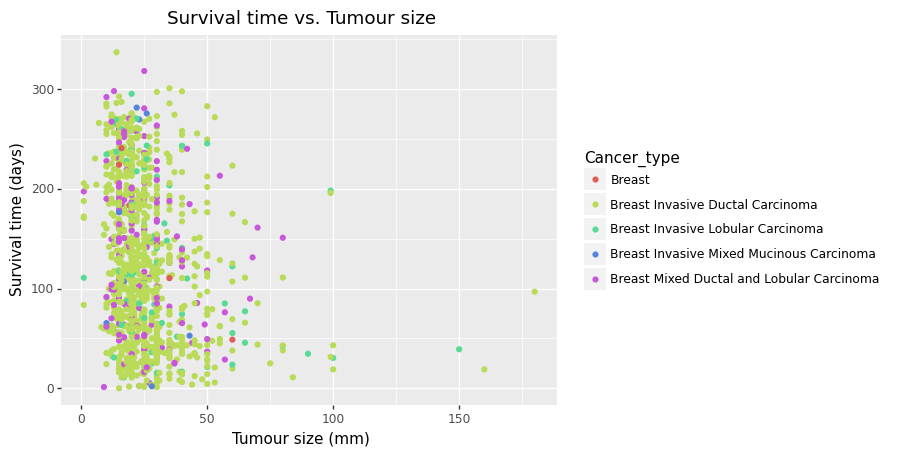

<ggplot: (8741554780825)>

In [5]:
import plotnine as p9

metabric_p9_plot = (p9.ggplot(metabric, 
                             p9.aes(x="Tumour_size", 
                                    y="Survival_time", 
                                    colour="Cancer_type")) +  
                    p9.geom_point() +  
                    p9.ggtitle("Survival time vs. Tumour size") +  
                    p9.xlab("Tumour size (mm)") + 
                    p9.ylab("Survival time (days)"))

metabric_p9_plot # let's see the arguments of interest to us (coloring by type of cancer is not, in this case, information for the basic one-argument model)

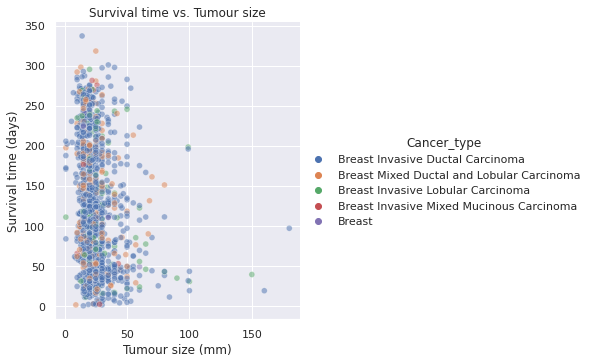

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.relplot(data=metabric, 
            x="Tumour_size", 
            y="Survival_time", 
            hue="Cancer_type",
            alpha=.5).set(title="Survival time vs. Tumour size",
                          xlabel="Tumour size (mm)",
                          ylabel="Survival time (days)")

In [7]:
import plotly.express as px
fig = px.scatter(metabric, 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size",
                 color="Cancer_type",
                 labels={"Tumour_size":"Tumour size (mm)",
                             "Survival_time":"Survival time (days)",
                             "Cancer_type":"Cancer type"})
fig.show()

# play with the axis scales

As with `statsmodels`, using `sklearn`, we can run simple linear regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

There are three steps to completing this analysis:
1. **Instantiate** the model: create an object that holds the model specification.
2. **Fit** the model: fit the specified model to the data using the `.fit` function.
3. **Display** the results: use the `X` method of the fitted model to return a detailed breakdown of the model characteristics.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Instantiate the model
lin_reg = LinearRegression()

In [10]:
# Define the predictor ('X') and the response ('y').
X = metabric.loc[:, ["Tumour_size"]].values
y = metabric["Survival_time"]

In [11]:
# Fit the model
lin_reg.fit(X, y)

LinearRegression()

In [12]:
# Get the predictions
X = np.linspace(0, 150, 10).reshape(-1,1) # `lin_reg.predict` expects a 2-dimensional numpy.array; we create an artificial set of predictors to create a line on the below graph
y_hat = lin_reg.predict(X)

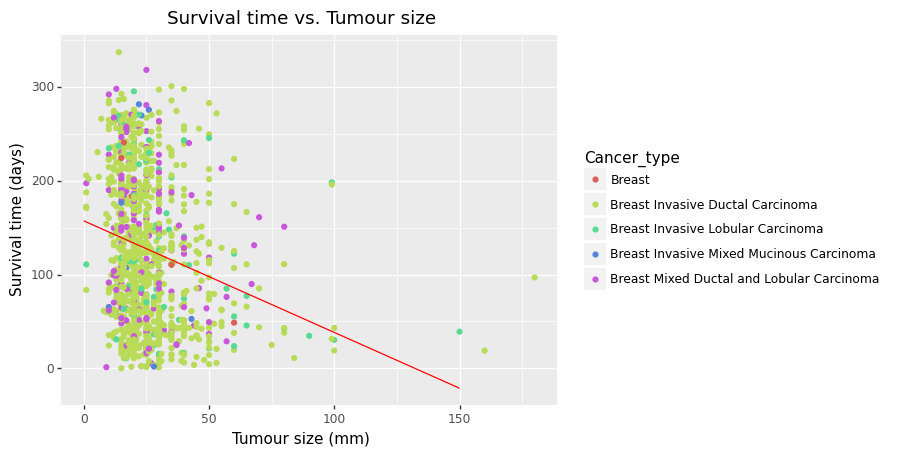

<ggplot: (8741552507181)>

In [13]:
# Display the results
predictions = pd.DataFrame({'X':X.reshape(-1), 'y_hat': y_hat}) # plotnine works with pd.DataFrame
metabric_p9_plot + p9.geom_line(p9.aes(x='X', y='y_hat'), data=predictions, color='red') # Overlay the regression line on the scatter plot

[(0.0, 350.0),
 Text(0, 0.5, 'Survival time (days)'),
 Text(0.5, 0, 'Tumour size (mm)'),
 Text(0.5, 1.0, 'Survival time vs. Tumour size')]

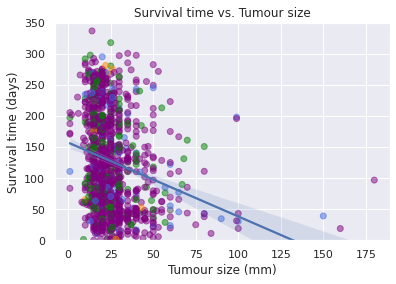

In [14]:
# alternative visualization with automatic regression visualization, along with the deviation spectrum; quick method to preview data

color_map = tuple(metabric["Cancer_type"].apply(lambda x: {k: v for v, k in zip(['darkorange', 'royalblue', '#555555', 'green', 'purple'],
                                  set(metabric['Cancer_type'].values))}.get(x)))

sns.regplot(data=metabric, # source dataset
            x="Tumour_size", 
            y="Survival_time",
            scatter_kws=dict(alpha=.5,
                             color=color_map)).set(title="Survival time vs. Tumour size",
                          xlabel="Tumour size (mm)",
                          ylabel="Survival time (days)",
                          ylim=(0,350))
                             
# c=95; Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. 
# The confidence interval is estimated using a bootstrap

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

X_train, X_test, y_train, y_test = train_test_split(metabric["Tumour_size"],
                                                    metabric["Survival_time"], 
                                                    test_size=.2, 
                                                    random_state=42) # to get repeatable results

lin_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

y_predicted = lin_reg.predict(X_test.to_numpy().reshape(-1,1))

print("MSE:", mean_squared_error(y_test, y_predicted))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, y_predicted)))

# more: https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be

fig = px.scatter(pd.DataFrame(dict(Tumour_size=list(X_test), Survival_time=[item for sublist in y_predicted for item in sublist])), 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size",
                 labels={"Tumour_size":"Tumour size (mm)",
                             "Survival_time":"Survival time (days)"})
fig.show()

MSE: 5507.957105299054
SQUARE ROOT MSE:  74.21561227463567


**What is the validation set for?**

**What is a test set and why should we use it?**


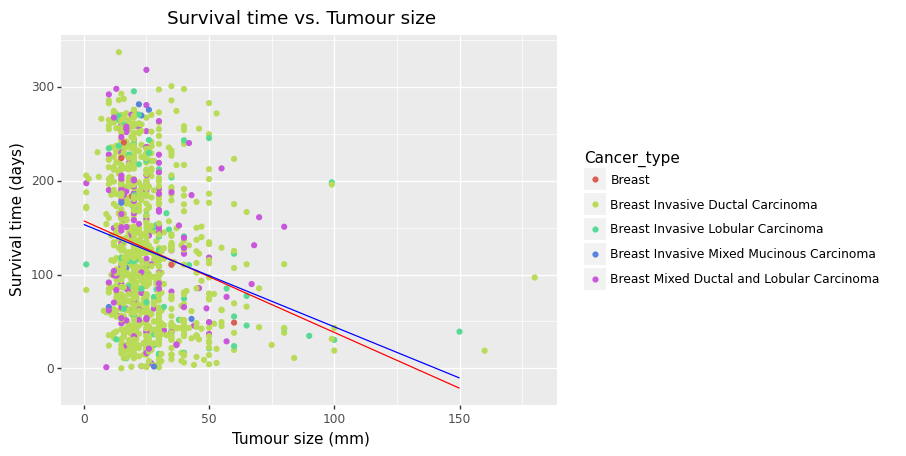

<ggplot: (8741546003749)>

In [18]:
X = np.linspace(0, 150, 10).reshape(-1,1)
y_hat = lin_reg.predict(X)

predictions_2 = pd.DataFrame({'X':X.reshape(-1), 'y_hat': y_hat.reshape(-1)}) 

(metabric_p9_plot +  # previous visualization recycling
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, # full dataset
              color='red') + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions_2, # train dataset
              color='blue'))

## 2. Multivariate linear regression

As with `statsmodels`, we can apply a similar procedure to run the multivariate regression too. This time, however, we need to a little more work with the categorical variables. We'll first do that work using `pandas`, then demonstrate how to use `sklearn` to achieve the same result that will generalise to more complex examples.

We cannot use `linear.LinearRegression` directly because, unlike `statsmodels`, `sklearn` doesn't automatically treat the `str` types in `Cancer_type` ande `ER_status` columns.

First, we convert the `ER_status` to `0.0`s and `1.0`s (i.e. we 'binarize' the variable).

In [ ]:
metabric['ER_status_binary'] = (metabric.ER_status == 'Positive').astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Next, let's 'one-hot-encode' the `Cancer_type`. This is a transformation of a single column of categorical features into an array of binary features, one-per-category, where each row has a single `1.0` ('one-hot') in the column corresponding to the matching category. This is made clearer by example.

In [ ]:
cancer_types = list(metabric.Cancer_type.unique())
cancer_types

['Breast Invasive Ductal Carcinoma',
 'Breast Mixed Ductal and Lobular Carcinoma',
 'Breast Invasive Lobular Carcinoma',
 'Breast Invasive Mixed Mucinous Carcinoma',
 'Breast']

In [ ]:
for cancer_type in cancer_types:
    column_name = 'Cancer_type_' + cancer_type
    metabric[column_name] = (metabric.Cancer_type == cancer_type).astype(np.float)

metabric.columns[metabric.columns.str.startswith("Cancer_type_")].tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



['Cancer_type_Breast Invasive Ductal Carcinoma',
 'Cancer_type_Breast Mixed Ductal and Lobular Carcinoma',
 'Cancer_type_Breast Invasive Lobular Carcinoma',
 'Cancer_type_Breast Invasive Mixed Mucinous Carcinoma',
 'Cancer_type_Breast']

In [ ]:
# Define the predictors ('X') and the response ('y')
X = metabric.loc[:, ["ER_status_binary",
                     "Cancer_type_Breast Invasive Ductal Carcinoma",
                     "Cancer_type_Breast Mixed Ductal and Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Lobular Carcinoma",
                     "Cancer_type_Breast Invasive Mixed Mucinous Carcinoma",
                     "Cancer_type_Breast",  
                     "Tumour_size"]]

y = metabric["Survival_time"]

In [ ]:
X.head()

,ER_status_binary,Cancer_type_Breast Invasive Ductal Carcinoma,Cancer_type_Breast Mixed Ductal and Lobular Carcinoma,Cancer_type_Breast Invasive Lobular Carcinoma,Cancer_type_Breast Invasive Mixed Mucinous Carcinoma,Cancer_type_Breast,Tumour_size
1,1.0,1.0,0.0,0.0,0.0,0.0,10.0
4,1.0,0.0,1.0,0.0,0.0,0.0,40.0
5,1.0,1.0,0.0,0.0,0.0,0.0,31.0
8,1.0,1.0,0.0,0.0,0.0,0.0,16.0
9,1.0,0.0,0.0,1.0,0.0,0.0,28.0


In [ ]:
y.head()

1    84.633333
4    41.366667
5     7.800000
8    36.566667
9    36.266667
Name: Survival_time, dtype: float64

In [ ]:
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# Inspect the fit regression coefficients and intercept
lin_reg.intercept_, lin_reg.coef_

(161.8016862086243,
 array([ 13.03538225, -17.57512295,  -7.66583289,  -7.4337667 ,
         -2.07277446,  34.74749699,  -1.16952734]))

You might be thinking that's a lot of extra work compared with the `statsmodels` version. Luckily, `sklearn` has the concepts of `Transformer`s and `Pipeline`s that are built to handle this, and much more complex preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = metabric.loc[:, ["ER_status", "Cancer_type", "Tumour_size"]]
y = metabric["Survival_time"]

label_transformer = OneHotEncoder(drop='if_binary')

preprocessor = ColumnTransformer(transformers=[('labels', 
                                                label_transformer, 
                                                ['ER_status', 
                                                 'Cancer_type']),],
                                 remainder='passthrough')

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.14 (default, Sep  8 2022, 00:06:44)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 21.1.3
setuptools: 57.4.0
   sklearn: 0.23.0
     numpy: 1.21.6
     scipy: 1.7.3
    Cython: 0.29.32
    pandas: 1.3.5
matplotlib: 3.2.2
    joblib: 1.2.0

Built with OpenMP: True


In [ ]:
!pip install 'scikit-learn==0.23'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
preprocessor.fit_transform(X)

array([[ 1.,  0.,  1., ...,  0.,  0., 10.],
       [ 1.,  0.,  0., ...,  0.,  1., 40.],
       [ 1.,  0.,  1., ...,  0.,  0., 31.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0., 20.],
       [ 1.,  0.,  0., ...,  0.,  1., 20.],
       [ 1.,  0.,  0., ...,  1.,  0., 22.]])

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', 
                            preprocessor), 
                           ('model', 
                            lin_reg)])
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('labels',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['ER_status',
                                                   'Cancer_type'])])),
                ('model', LinearRegression())])

In [ ]:
# Inspect the fit regression coefficients and intercept (sanity check - let's ensure we get what we had before!)
pipeline['model'].intercept_, pipeline['model'].coef_

(161.80168620862443,
 array([ 13.03538225,  34.74749699, -17.57512295,  -7.4337667 ,
         -2.07277446,  -7.66583289,  -1.16952734]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.2, 
                                                    )#random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', lin_reg)])
pipeline.fit(X_train, y_train)

y_hat = pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_hat))
print("SQUARE ROOT MSE: ", math.sqrt(mean_squared_error(y_test, y_hat)))

fig = px.scatter(pd.DataFrame(dict(Tumour_size=list(X_test["Tumour_size"]),
                                   Cancer_type=list(X_test["Cancer_type"]),
                                   Survival_time=y_hat)), 
                 x="Tumour_size", 
                 y="Survival_time", 
                 title="Survival time vs. Tumour size - Multivariate linear regression - Prediction results",
                 color="Cancer_type",
                 labels={"Tumour_size":"Tumour size (mm)",
                         "Survival_time":"Survival time (days)",
                         "Cancer_type":"Cancer type"})
fig.show()

MSE: 6217.992544158933
SQUARE ROOT MSE:  78.8542487387898


As with any regression model, it's instructive to plot a histogram of the residuals. (TL;DR; - it's not exactly very predictive!)

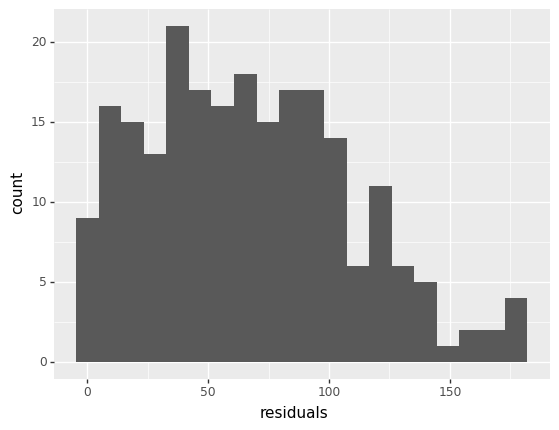

<ggplot: (8759368256405)>

In [ ]:
residuals = pd.DataFrame({'residuals': np.abs(y_test-y_hat)})

# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
p9.ggplot(residuals, p9.aes('residuals')) + p9.geom_histogram(bins=20)

In [ ]:
fig = px.histogram(residuals, x="residuals", nbins=20)
fig.show()

## 3. Moving beyond linear models

We can work on the US Census Bureau's [1985 Current Population Survey (CPS)](https://www.census.gov/programs-surveys/cps/library/publications.1985.html) to investigate how more powerful, non-linear models behave.

In [19]:
import urllib, os
from sklearn import ensemble

In [20]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pd.read_csv('wages.txt', 
                   skiprows=27, 
                   skipfooter=6, 
                   sep=None,
                   header=None, 
                   names=['EDUCATION','SOUTH','SEX','EXPERIENCE',
                          'UNION','WAGE','AGE','RACE','OCCUPATION',
                          'SECTOR','MARR'],
                   engine='python')

The fundamental question in machine learning is, 'how wiggly do I make my line?'. One way to assess this is to use a 'holdout' set. We fit the model on some proportion of the available data, and 'hold out' the rest to evaluate how well the model generalises to data it's never previously seen.

In [53]:
from sklearn.model_selection import train_test_split

wages_train, wages_test = train_test_split(data, test_size=.02)

In [35]:
wages_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 282 to 240
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   507 non-null    int64  
 1   SOUTH       507 non-null    int64  
 2   SEX         507 non-null    int64  
 3   EXPERIENCE  507 non-null    int64  
 4   UNION       507 non-null    int64  
 5   WAGE        507 non-null    float64
 6   AGE         507 non-null    int64  
 7   RACE        507 non-null    int64  
 8   OCCUPATION  507 non-null    int64  
 9   SECTOR      507 non-null    int64  
 10  MARR        507 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 47.5 KB


In [27]:
wages_train.describe()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,13.021077,0.290398,0.456674,17.573770,0.180328,9.033817,36.594848,2.686183,4.227166,0.288056,0.655738
std,2.650543,0.454479,0.498704,12.203327,0.384911,5.166682,11.626717,0.688518,1.640855,0.542921,0.475684
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,27.500000,3.000000,3.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.800000,35.000000,3.000000,5.000000,0.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,3.000000,6.000000,0.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,3.000000,6.000000,2.000000,1.000000


In [28]:
wages_train.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
297,14,1,1,15,0,10.43,35,3,3,0,1
29,12,0,0,8,0,4.75,26,3,6,0,1
469,12,1,1,21,0,5.75,39,3,5,0,1
314,12,0,1,8,0,5.25,26,3,3,0,0
279,12,1,0,12,0,8.43,30,3,3,0,1


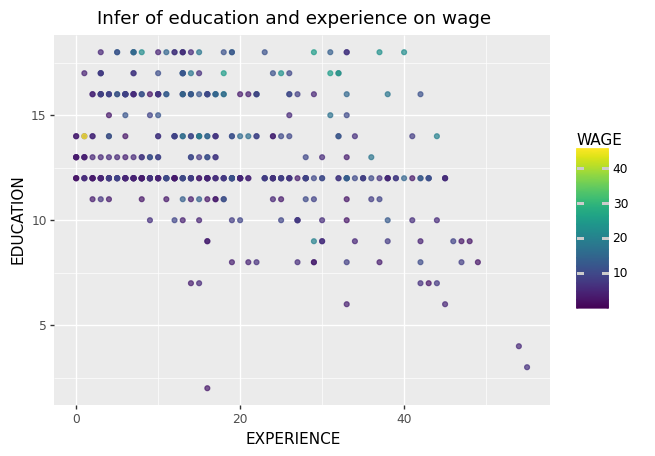

<ggplot: (8741545627313)>

In [29]:
(p9.ggplot(wages_train, p9.aes("EXPERIENCE", "EDUCATION")) + 
 p9.geom_point(p9.aes(color='WAGE'), alpha=0.7) + 
 p9.ggtitle("Infer of education and experience on wage"))

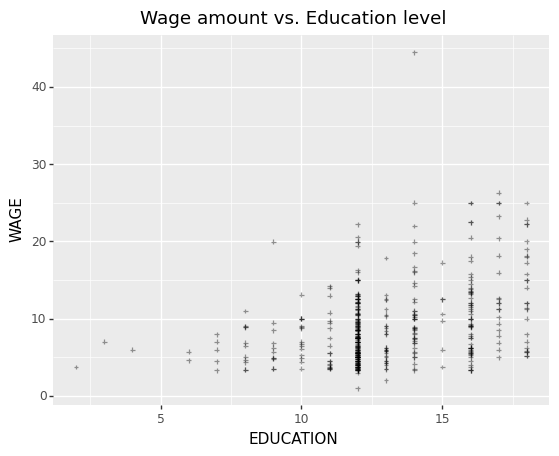

<ggplot: (8741545624753)>

In [30]:
(p9.ggplot(wages_train, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) +
 p9.ggtitle("Wage amount vs. Education level"))

### Decision Trees and Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



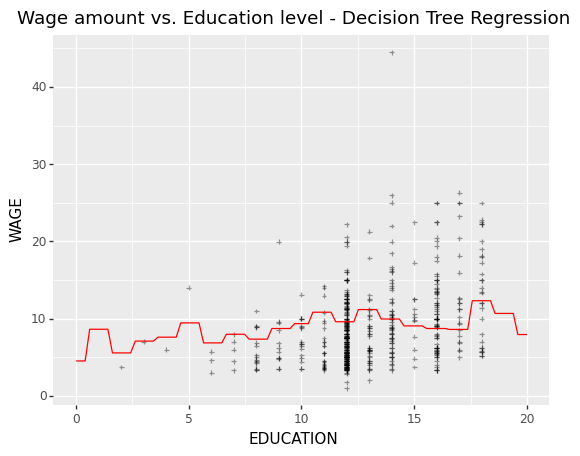

<ggplot: (8741545588821)>

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])

X = np.linspace(0,20,100).reshape(-1,1)
y_hat = model.predict(X)

predictions = pd.DataFrame({'X': X.reshape(-1), 
                            'y_hat': y_hat}) 

predictions1 = predictions

(p9.ggplot(wages_train, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, 
              color='red') +
 p9.ggtitle("Wage amount vs. Education level - Decision Tree Regression"))



In [45]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

-0.2593505320336438

In [47]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [4.53]
|   |--- feature_0 >  0.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- value: [8.63]
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- value: [5.57]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [7.10]
|   |   |--- feature_0 >  3.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |--- value: [7.61]
|   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |--- value: [9.46]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- value: [6.87]
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |--- value: [7.99]
|   |   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |   |--- value: [7.35]
|--- feature_0 >  8.50
|   |--- feature_0 <= 44.50
|   |  

In [ ]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(model, feature_names='EXPERIENCE', filled=True)

In [54]:
model = ensemble.RandomForestRegressor()

model.fit(X=wages_train.loc[:,['EXPERIENCE']], 
          y=wages_train['WAGE'])

RandomForestRegressor()

In [55]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

-0.030849739154669376

In [56]:
X = np.linspace(0,20,100).reshape(-1,1)
y_hat = model.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



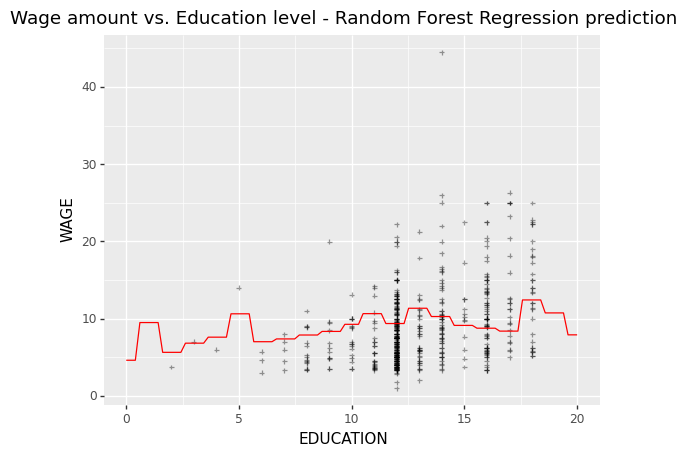

<ggplot: (8741545521357)>

In [57]:
predictions = pd.DataFrame({'X': X.reshape(-1), 
                            'y_hat': y_hat}) 

predictions2 = predictions

(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', 
                     y='y_hat'), 
              data=predictions, 
              color='red') +
 p9.ggtitle("Wage amount vs. Education level - Random Forest Regression prediction"))

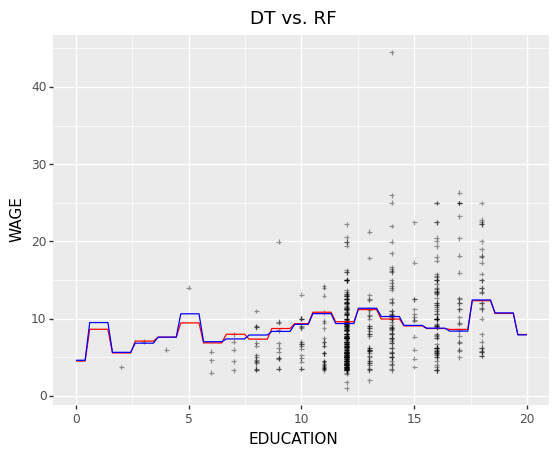

<ggplot: (8741545349037)>

In [58]:
(p9.ggplot(data, p9.aes("EDUCATION", "WAGE")) + 
 p9.geom_point(shape='+', alpha=0.4) + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions1,
              color='red') + 
 p9.geom_line(p9.aes(x='X', y='y_hat'), 
              data=predictions2,
              color='blue') +
 p9.ggtitle("DT vs. RF"))

Now assess the model performance (coefficient of determination R^2 of the prediction) on the test set.

In [ ]:
model.score(X=wages_test.loc[:,['EXPERIENCE']], y=wages_test['WAGE'])

0.06630111879964307

If is negative, it means that our model performance is worse than if we just predicted the mean value of `WAGE` for every sample!

### Extending to multivariate models

As we did with the linear regression, we can extend the RandomForestRegressor to work with more than one predictor variable. Let's see how good our model is when we include `EXPERIENCE` alongside `EDUCATION`.

In [59]:
model = ensemble.RandomForestRegressor()
model.fit(X=wages_train.loc[:,['EXPERIENCE', 'EDUCATION']], y=wages_train['WAGE'])

RandomForestRegressor()

In [60]:
ed_min, ed_max = wages_train.EDUCATION.min(), wages_train.EDUCATION.max()
ex_min, ex_max = wages_train.EXPERIENCE.min(), wages_train.EXPERIENCE.max()

In [61]:
grid = np.mgrid[ex_min - 1:ex_max + 1:100j, ed_min - 1:ed_max + 1:100j]
X = grid.reshape((2, -1)).T
prediction = model.predict(X)
prediction = np.reshape(prediction, (100, 100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [62]:
model.score(X=wages_test.loc[:,['EXPERIENCE', 'EDUCATION']], y=wages_test['WAGE'])

0.4667658428717333

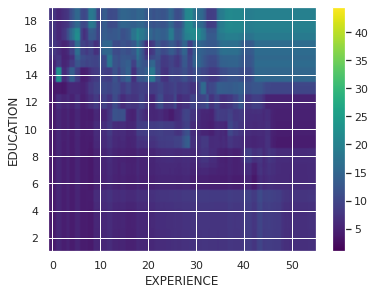

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot()
ax.set_ylabel('EDUCATION')
ax.set_xlabel('EXPERIENCE')
wage_min, wage_max = data.WAGE.min(), data.WAGE.max()
wages_plot = ax.imshow(
    np.rot90(prediction),
    vmin=wage_min,
    vmax=wage_max,
    aspect='auto',
    extent=(ex_min - 1, ex_max, ed_min -1, ed_max + 1),
    cmap=plt.cm.viridis)

fig.colorbar(wages_plot, ax=ax)

This is an example of 'overfitting' the training set - the model has learned to approximate the noise in our training set, rather than learning to extrapolate or interpolate in a way that generalises to samples it has not seen before.

# Exercises

We will work with the built-in `sklearn.datasets` diabetes dataset.

This dataset comprises 442 diabetes patients, each with ten baseline predictors: age, sex, body mass index, average blood pressure, and six blood serum measurements. The response variable is measure of disease progression one year after baseline. (Note that it is not neccessary to transform any of these variables prior to training the model - everything is all ready to go straight into `sklearn`.)

In [ ]:
from sklearn import datasets
diabetes_dataset = datasets.load_diabetes()
predictors = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)
response = diabetes_dataset.target

predictors.head()

### Exercise 1

Using sklearn, fit a multivariate linear regression using all 442 samples to predict the response variable. Use all 10 predictors, and also score your model using predictions on all 442 samples.

### Exercise 2

Do a test-train split, and run _Exercise 1_ again, this time fitting your model with the training set, and scoring it both with the test set and with the training set.

### Exercise 3

As with Exercise 2, but this time try using the default [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) instead. How do your results compare? Try just using one or two predictors.

### Exercise 4

Dive into the documentation of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and try tweaking some of the _hyperparameters_ to see how this affects your model score on the training and test datasets ('n_estimators' and 'max_depth' are good places to start). If you want do delve deeper this [blog post](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) is a nice introduction to the concepts of _cross-validation_ and _hyperparameter tuning_ (more on this next week though!).

### Exercise 5
Find definitions and learn basic jargon words and concepts:
- probability
- bayes theorem
- mean
- median
- regression
- classification
- clustering
- features
- attributes
- parts of data set division
- labels
- hyperparameters
- overfitting
- underfitting
- dev set
- ROC curve
- data mining
- AI
- Bayes theorem
- pattern recognition/statistics, 
- unsupervised vs. supervised learning, 
- train/test split, 
- bias/variance tradeoff (generalisability)
- regularisaton
- loss function
- Turing Test
- bootstrap

In [ ]:
# Heart Attack Analysis & Prediction Dataset

# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

from google.colab import files
 
 
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
import pandas as pd
import io
 
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

heart_train, heart_test = train_test_split(data, test_size=.2)

In [ ]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.338843,0.706612,0.979339,131.876033,246.293388,0.152893,0.508264,149.041322,0.322314,1.045455,1.404959,0.719008,2.334711,0.528926
std,9.098861,0.456259,1.024385,17.874421,53.449250,0.360630,0.525229,23.403159,0.468331,1.166155,0.618907,1.020318,0.610722,0.500197
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
